### From country to country, what trends can we discover between foods, obesity, and COVID-19 survival rates?

### The dataset can be found here: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_Quantity_kg_Data.csv

In [81]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display, HTML

In [82]:
FILE_PATH = "Food_Supply_Quantity_kg_Data.csv"
df = pd.read_csv(FILE_PATH)

### Let's get a glimpse of the dataset:

In [83]:
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


### The last column is not necessary. Drop it:

In [84]:
df = df.iloc[: , :-1]
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.5345,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.3261,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,1.0310,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.6463,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.8102,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0


### Do we have any missing values in the data? 

In [85]:
df.columns[(df.isnull().sum()>0).isin([True])]

Index(['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active'],
      dtype='object')

### Yes, these 6 columns contain null values. Drop the rows (countries) that have null values: 

In [86]:
df = df.dropna()

### Confirm that there are no longer null values in the dataframe:

In [87]:
df.columns[(df.isnull().sum()>0).isin([True])]

Index([], dtype='object')

### We can see that there are a number of countries, foods, and health statuses. Dig into the metadata: How many rows and columns are there? How many countries are there? 

In [88]:
print("There are {} rows (and therefore, countries) and {} columns.".format(df.shape[0],df.shape[1])) 
print()
print("Here are the column names:", df.columns)

There are 154 rows (and therefore, countries) and 31 columns.

Here are the column names: Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population'],
      dtype='object')


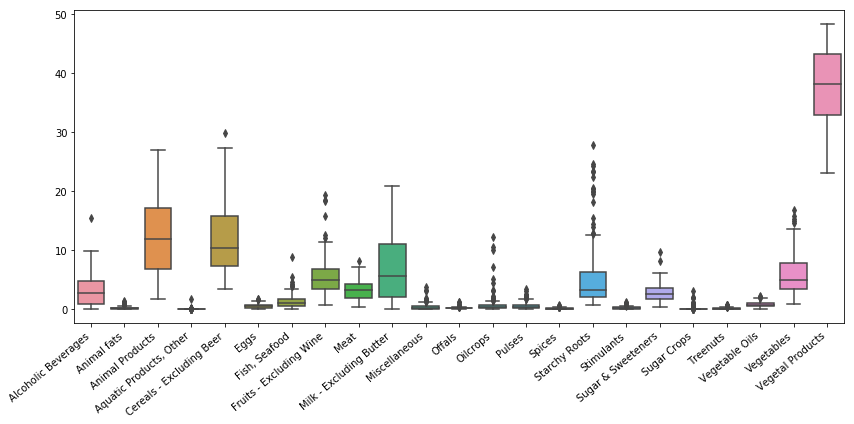

In [89]:
foods_df = df.drop(['Country',
         'Obesity','Undernourished',
         'Confirmed','Deaths','Recovered',
         'Active','Population'], axis=1)
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=foods_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### What are the top 5 countries with the highest rates of obesity? The bottom 5? 

In [90]:
most_obese = df.nlargest(5, 'Obesity')  # equivalent to: df.sort_values(['Obesity'], ascending=False).groupby('Country').head(5)
least_obese = df.nsmallest(5, 'Obesity')  # equivalent to: df.sort_values(['Obesity']).groupby('Country').head(5)

display(HTML(most_obese.to_html()))

display(HTML(least_obese.to_html()))

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
131,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,1.9647,0.7751,0.1398,10.5187,0.0000,0.0582,7.6944,0.1344,2.0811,0.0036,0.0108,0.5117,1.1656,38.8349,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0
161,United States of America,4.8647,0.1681,21.2352,0.0020,5.5048,0.7860,1.1287,4.5432,6.2645,12.8657,0.0000,0.0197,0.3246,0.1893,0.0490,2.8390,0.2458,3.3200,0.0000,0.1772,0.9889,5.7249,28.7587,37.3,<2.5,8.159922,0.140103,0.000000,8.019819,329878000.0
83,Kuwait,0.0044,0.0022,10.7213,0.0022,11.4132,1.3306,0.8343,5.3058,4.8770,3.4788,0.8554,0.1969,0.2783,0.4353,0.2020,3.2296,0.2696,2.9163,0.0276,0.1512,1.1976,12.9953,39.2750,37.0,2.8,3.624728,0.020550,3.434087,0.170092,4691000.0
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,5.8598,0.6690,0.1547,0.1492,0.4768,0.2434,1.4542,0.2050,2.8571,0.0009,0.1135,1.7626,5.7024,37.0038,35.0,7.1,1.055795,0.018256,1.030898,0.006641,35041000.0
77,Jordan,0.0846,0.1162,9.3186,0.0000,14.1380,0.3344,0.5985,4.6624,3.8651,4.2637,0.3579,0.1397,0.7280,0.6393,0.0469,2.1431,0.3742,4.7276,0.0000,0.1652,1.9861,10.6308,40.6798,33.4,12.2,3.126276,0.040912,2.991760,0.093604,10679000.0


,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,0.6069,0.0126,0.4149,0.8410,0.2032,0.2074,1.0596,0.2880,1.2846,0.8150,0.3070,0.2201,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0
150,Timor-Leste,0.4459,0.0897,5.4983,0.0000,26.3320,0.1025,1.0225,2.1027,4.0376,0.1307,0.8905,0.1153,0.5612,0.9098,0.0500,5.5022,1.0136,2.8203,0.0000,0.0013,0.6842,3.1867,44.5030,2.9,24.9,0.006070,0.000000,0.004628,0.001442,1318000.0
11,Bangladesh,0.0031,0.0156,5.1926,0.0000,29.8045,0.2957,2.5221,2.8655,0.4191,1.8778,0.0197,0.0633,0.0820,0.7065,0.3195,5.3378,0.0529,0.9285,0.1950,0.0934,0.7615,3.6405,44.8033,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0
24,Cambodia,4.5783,0.0377,6.0800,0.0000,24.8906,0.1310,4.2369,2.3184,1.2247,0.3285,0.4853,0.1211,0.7900,0.4903,0.0784,3.0519,0.1260,2.9923,0.8367,0.0238,0.2511,3.0072,43.9195,3.5,16.4,0.003059,0.000000,0.002930,0.000129,15497000.0
48,Ethiopia,2.4543,0.0276,5.2956,0.0000,22.0779,0.0594,0.0608,1.1774,0.7462,4.2647,0.0180,0.1382,0.2322,3.0195,0.4298,11.2918,0.2957,1.3170,0.0000,0.0802,0.4699,1.8449,44.6989,3.6,20.6,0.123093,0.001867,0.109237,0.011989,114916000.0


### According to the CDC, obesity worsens outcomes from COVID-19: https://www.cdc.gov/obesity/data/obesity-and-covid-19.html 
### Let's explore the obesity column:

In [91]:
df['Obesity'].describe()

count    154.000000
mean      18.449351
std        9.519483
min        2.100000
25%        8.250000
50%       21.300000
75%       25.700000
max       45.500000
Name: Obesity, dtype: float64

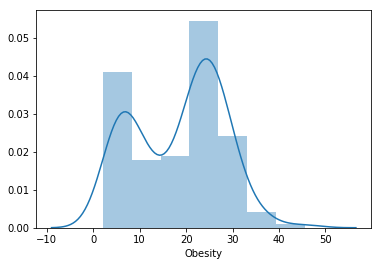

In [92]:
sns.distplot(df['Obesity'])

In [94]:
food_names = foods_df.columns.tolist()
len(food_names)

23

### How does consumption of each food type correlate to the obesity rate?

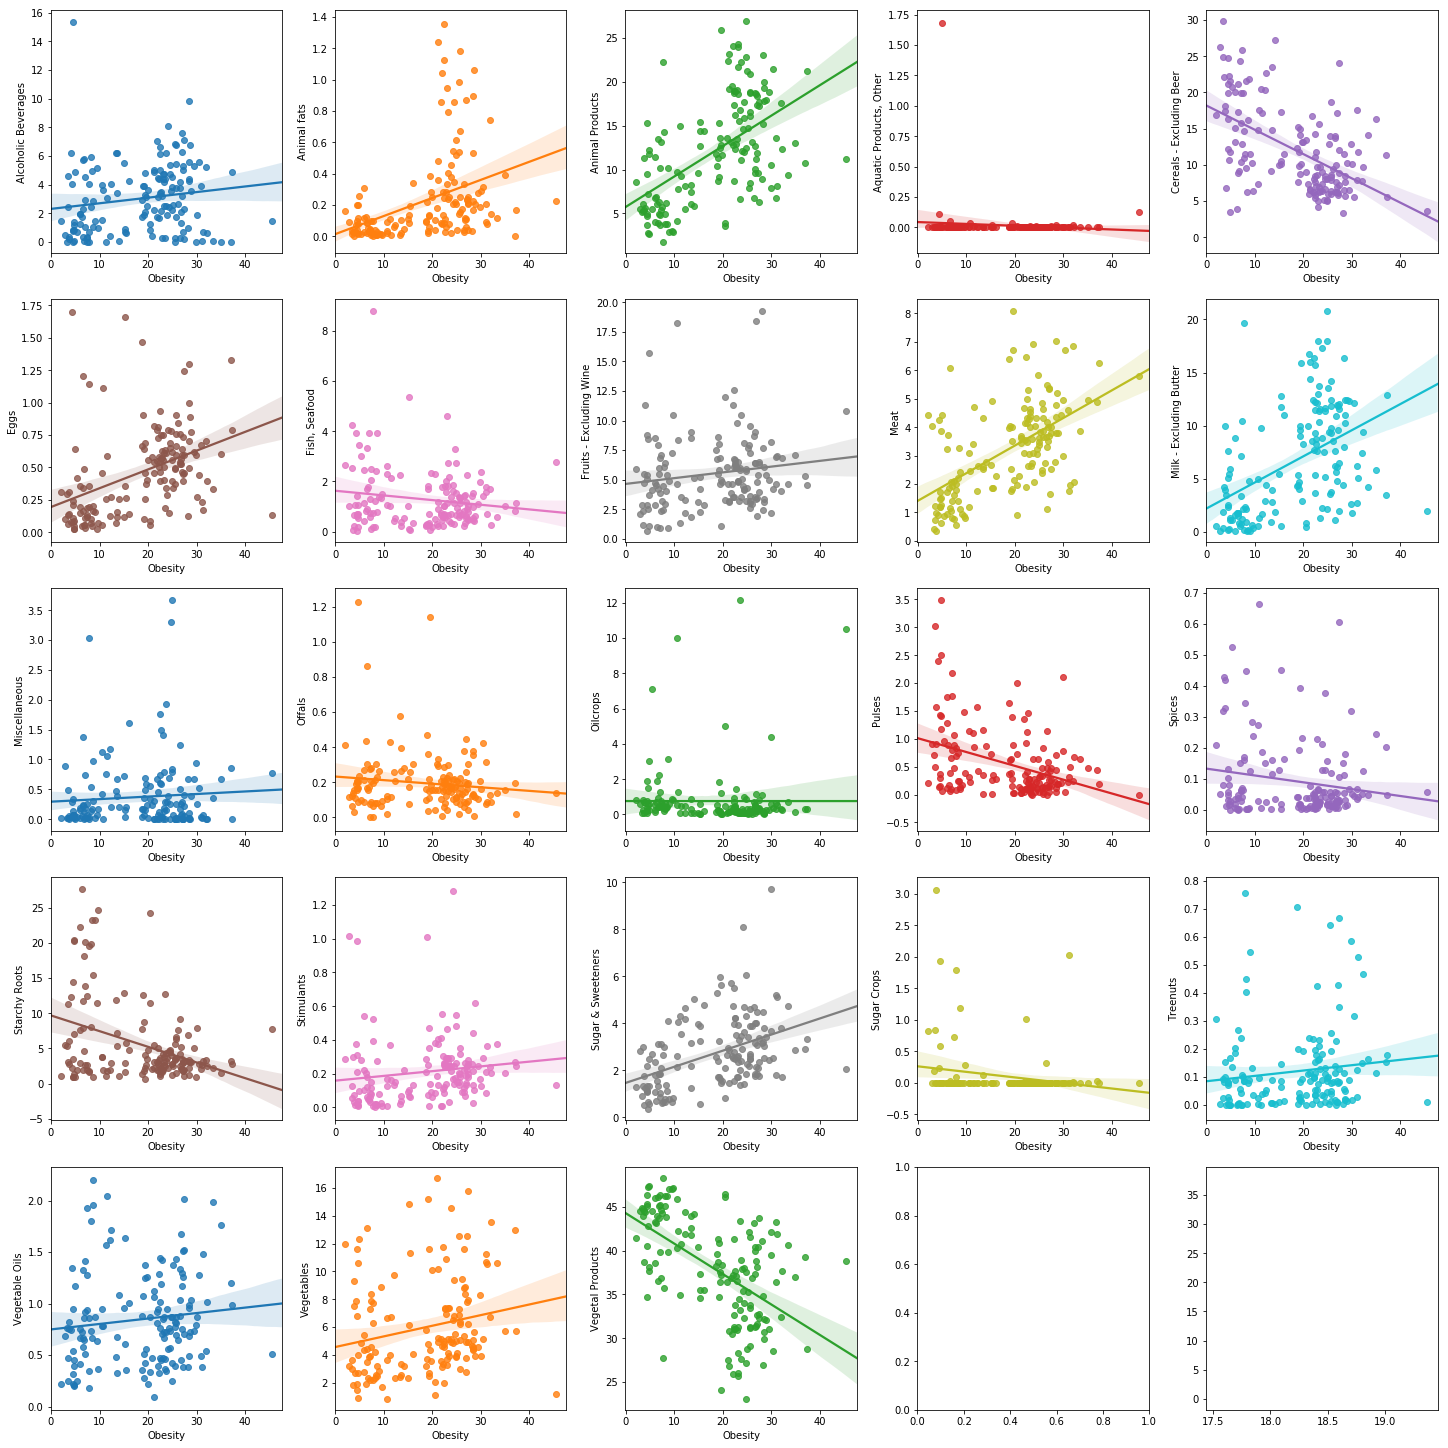

In [120]:
fig, axs = plt.subplots(nrows=5,ncols=5,constrained_layout=True)
fig.set_figheight(20)
fig.set_figwidth(20)

row,col=0,0
length = len(food_names)
for i in range(length):
    if row > length/5:
        break
    if col > 4:
        row+=1
        col=0
    sns.regplot(x='Obesity', y=food_names[i], data=df, ax=axs[row,col])
    col+=1

### How does the recovery rate correlate with different foods?

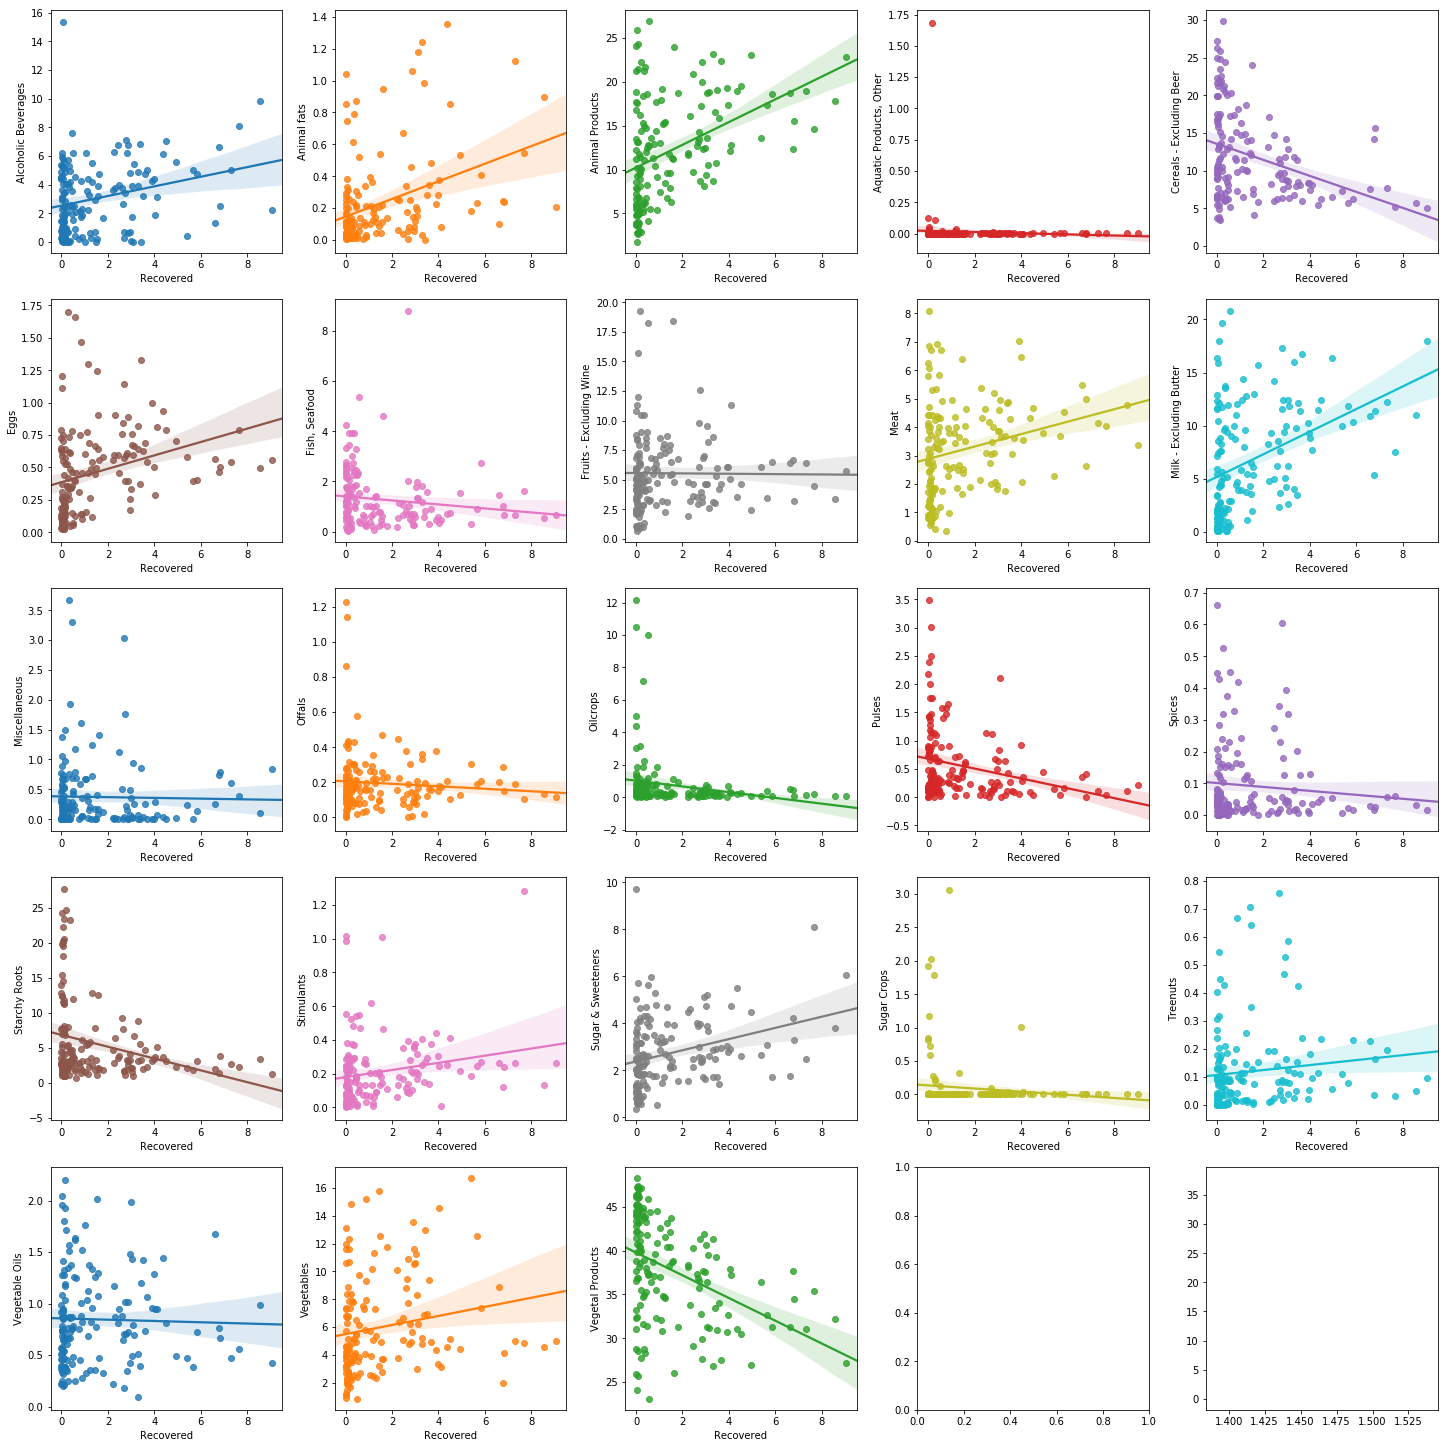

In [122]:
fig, axs = plt.subplots(nrows=5,ncols=5,constrained_layout=True)
fig.set_figheight(20)
fig.set_figwidth(20)

row,col=0,0
length = len(food_names)
for i in range(length):
    if row > length/5:
        break
    if col > 4:
        row+=1
        col=0
    sns.regplot(x='Recovered', y=food_names[i], data=df, ax=axs[row,col])
    col+=1

### The similarities in slopes between the Obesity and Recovered graphs for each food confirms the negative relationship between obesity and COVID-19 outcomes.